In [2]:
from pylab import *
#import random
p=0.47
p_1 = p # Wahrscheinlichkeit der Übertragung an Nachbarn
p_2 = p # Wahrscheinlichkeit krank zu bleiben
t_N = 100000
i_M = 100
A = np.zeros((t_N, i_M)) #erhalte nxm-Matrix mit 0-en
print (A)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [3]:
A[0][50] = 1 #eine beliebige Zahl der 1.Zeile wird 1 -> r0 = 0.01???

In [4]:
for i in range(t_N-1):
    for j in range(i_M):
        if A[i,j] == 1:
            if np.random.rand() < p_1: # Übertragung an Nachbarn
                A[i+1][(j+1)%i_M] = 1
            if np.random.rand() < p_2: # krank bleiben
                A[i+1][j] = 1
            if np.random.rand() < p_1: # Übertragung an Nachbarn
                A[i+1][(j-1)%i_M] = 1
                
            

In [5]:
%matplotlib inline

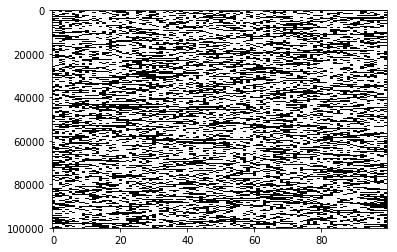

In [6]:
imshow(A,interpolation='none',aspect="auto", cmap='gray')
show()

In [9]:
Tohm = False
for y in range(t_N-1): #definiere Tohm als erste Nullzeile, also als Zeitpunkt, wenn die Krankheit verschwindet
    anzahl_einsen = 0
    for x in range(i_M):
        if A[y][x] == 1:
            anzahl_einsen = anzahl_einsen + 1
        if x == (i_M-1):
            if anzahl_einsen == 0:
                if Tohm == False:
                    Tohm = y 
                                    

    if (y == t_N - 2 and Tohm == False):
        Tohm = t_N + 1
            
print(Tohm)

100001


In [10]:
r_final = sum(A[Tohm-1][:],axis=None)#warum klappt es nicht mehr??????
print(r_final)

IndexError: index 100000 is out of bounds for axis 0 with size 100000

In [11]:
r = sum(A, axis = 1) #r definiert als Anzahl der Einsen pro Zeile, bzw. Anzahl der Erkrankten pro Zeitschritt
print(r)

[  1.   3.   3. ...,  68.  65.  65.]


Text(0,0.5,'r')

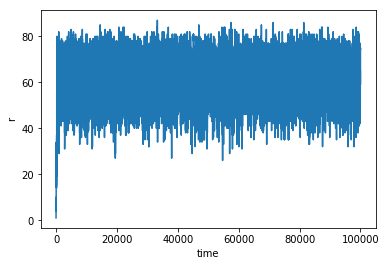

In [12]:
plot(r)#das ist das Diagamm t-r
xlabel('time')
ylabel('r')

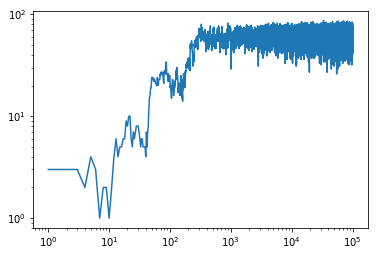

In [13]:
loglog(r)#beim doppelt logarythmisch plotten kommt schwachsinn raus... vielleicht falsches r???

Die Infektion geht durch und r saturiert dann mehr oder weniger bei einem Wert um r=60 herum(siehe erstes Diagramm), da die Übertragungswahrscheinlichkeit p > p_cr ist. 